In [21]:
import numpy
import pandas as pd
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [36]:
charDF = pd.read_csv("alphabet_data.csv").astype('float32')
charDF.rename(columns={'0':'label'}, inplace=True)

# split data to features and target
X = charDF.drop('label',axis = 1)
y = charDF['label']
y = y+10

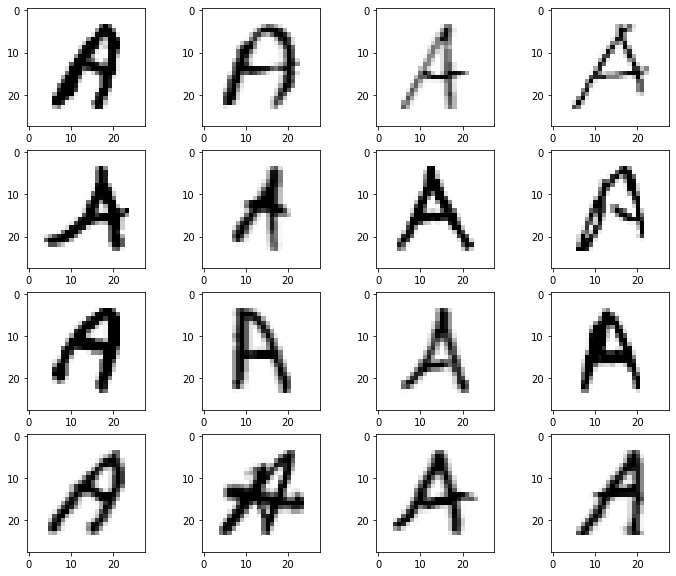

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [24]:
X = X.values.reshape(X.shape[0], 28, 28)

In [25]:
from sklearn.model_selection import train_test_split
(trainX,testX,trainY,testY) = train_test_split(X,y.astype("int"),test_size=0.2,random_state=42)

In [26]:
import numpy as np
X_train = np.append(X_train, trainX, axis=0)
X_test = np.append(X_test, testX, axis=0)
y_train = np.append(y_train, trainY, axis=0)
y_test = np.append(y_test, testY, axis=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(357960, 28, 28)
(84490, 28, 28)
(357960,)
(84490,)


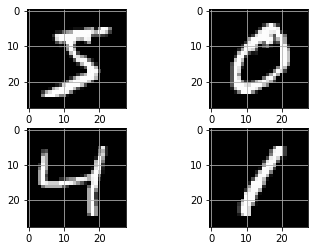

In [27]:
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [28]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam

In [29]:
# Reshaping to CNN format
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

# normalize inputs to values between 0 and 1
X_train /= 255
X_test /= 255

# one hot encode
num_of_class = 36
y_train = np_utils.to_categorical(y_train, num_of_class)
y_test = np_utils.to_categorical(y_test, num_of_class)

In [30]:
model = Sequential()
# first hidden layer, convolutional layer, 32 filters/output channels with size of 5x5 and an activation function
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
# maxpooling layer, reduce overfitting, the number of parameters, training time
model.add(MaxPooling2D(pool_size=(2, 2)))
# another hidden layer
model.add(Conv2D(32, (3, 3), activation='relu'))
# another maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# regularization layer using dropout, randomly exclude 20% of neurons to reduce overfitting
model.add(Dropout(0.2))
# convert 2D matrix data to a vector
model.add(Flatten())
# fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))
# output layer with 10 neurons, number of class
model.add(Dense(num_of_class, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=200)


Train on 357960 samples, validate on 84490 samples
Epoch 1/8
357960/357960 [==============================] - 117s 326us/step - loss: 0.3042 - accuracy: 0.9146 - val_loss: 0.1175 - val_accuracy: 0.9678
Epoch 2/8
357960/357960 [==============================] - 120s 336us/step - loss: 0.1251 - accuracy: 0.9637 - val_loss: 0.0921 - val_accuracy: 0.9743
Epoch 3/8
357960/357960 [==============================] - 126s 351us/step - loss: 0.0998 - accuracy: 0.9708 - val_loss: 0.0802 - val_accuracy: 0.9781
Epoch 4/8
357960/357960 [==============================] - 117s 327us/step - loss: 0.0852 - accuracy: 0.9747 - val_loss: 0.0713 - val_accuracy: 0.9801
Epoch 5/8
357960/357960 [==============================] - 122s 340us/step - loss: 0.0756 - accuracy: 0.9773 - val_loss: 0.0642 - val_accuracy: 0.9827
Epoch 6/8
357960/357960 [==============================] - 149s 416us/step - loss: 0.0679 - accuracy: 0.9792 - val_loss: 0.0577 - val_accuracy: 0.9839
Epoch 7/8
357960/357960 [=================

In [32]:
metrics = model.evaluate(X_test, y_test, verbose=0)

In [33]:
print("Total loss:", metrics[0])
print("Accuracy:", metrics[1])

Total loss: 0.050982394139075723
Accuracy: 0.9862468838691711


In [38]:
model.save('hrmodel.h5')